# Perform healthcare data cleaning, including standardization, conversions, correction, and interpolation on uncleaned data

In [2]:
import pandas as pd

df = pd.read_csv('uncleaned_data.csv')

In [3]:
df.head(5)

,Patient_ID,Age_Years,Gender,Blood_Pressure,Weight_kg,Height_cm,Diagnosis,Insurance_Type,Lab_Results (Glucose),Admission_Date
0,2001,45.0,Male,120,75.5,175.0,Hypertension,Private,98,2024-01-15
1,2002,62.0,Female,145,88.0,162.0,Diabetes,Public,185,2024-02-28
2,2003,-5.0,Female,110,-60.0,168.0,NaN,Private,92,2024-03-01
3,2004,30.0,Male,130,80.0,NaN,Flu,Public,105,2024-01-15
4,2005,45.0,Male,120,75.5,175.0,Hypertension,Private,98,2024-01-15


In [4]:
# Remove duplicates
df.drop_duplicates(subset=df.columns.difference(['Patient_ID']))

,Patient_ID,Age_Years,Gender,Blood_Pressure,Weight_kg,Height_cm,Diagnosis,Insurance_Type,Lab_Results (Glucose),Admission_Date
0,2001,45.0,Male,120,75.5,175.0,Hypertension,Private,98,2024-01-15
1,2002,62.0,Female,145,88.0,162.0,Diabetes,Public,185,2024-02-28
2,2003,-5.0,Female,110,-60.0,168.0,NaN,Private,92,2024-03-01
3,2004,30.0,Male,130,80.0,NaN,Flu,Public,105,2024-01-15
5,2006,NaN,Other,Missing,72.0,170.0,Allergy,Public,101,2024-04-10
...,...,...,...,...,...,...,...,...,...,...
95,2096,58.0,Other,135,80.0,172.0,Asthma,Public,105,2024-10-05
96,2097,70.0,Male,160,100.0,175.0,Stroke,Private,250,2024-10-06
97,2098,50.0,F,122,85.0,165.0,Diabetes,Public,140,2024-10-07
98,2099,25.0,Male,110,68.0,178.0,Flu,Govt,90,2024-10-08


In [5]:
# Drop irrelevant feature
df.drop('Admission_Date', axis=1, inplace=True)

In [6]:
# Rename complex
df.rename(columns={'Lab_Results (Glucose)': 'Glucose_mg_dL'}, inplace=True)

In [7]:
# Standardization
import numpy as np

df.replace(['NA', 'NaN', 'Missing', ''], np.nan, inplace=True)

In [8]:
df.head(5)

,Patient_ID,Age_Years,Gender,Blood_Pressure,Weight_kg,Height_cm,Diagnosis,Insurance_Type,Glucose_mg_dL
0,2001,45.0,Male,120,75.5,175.0,Hypertension,Private,98
1,2002,62.0,Female,145,88.0,162.0,Diabetes,Public,185
2,2003,-5.0,Female,110,-60.0,168.0,NaN,Private,92
3,2004,30.0,Male,130,80.0,NaN,Flu,Public,105
4,2005,45.0,Male,120,75.5,175.0,Hypertension,Private,98


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      100 non-null    int64  
 1   Age_Years       93 non-null     float64
 2   Gender          100 non-null    object 
 3   Blood_Pressure  93 non-null     object 
 4   Weight_kg       93 non-null     float64
 5   Height_cm       90 non-null     float64
 6   Diagnosis       90 non-null     object 
 7   Insurance_Type  100 non-null    object 
 8   Glucose_mg_dL   100 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 7.2+ KB


In [10]:
# Conversions
df['Blood_Pressure'] = pd.to_numeric(df['Blood_Pressure'])

In [11]:
df['Glucose_mg_dL'] = df['Glucose_mg_dL'].astype(str).str.replace(' mg/dL', '', regex=False)
df['Glucose_mg_dL'] = pd.to_numeric(df['Glucose_mg_dL'])

[]

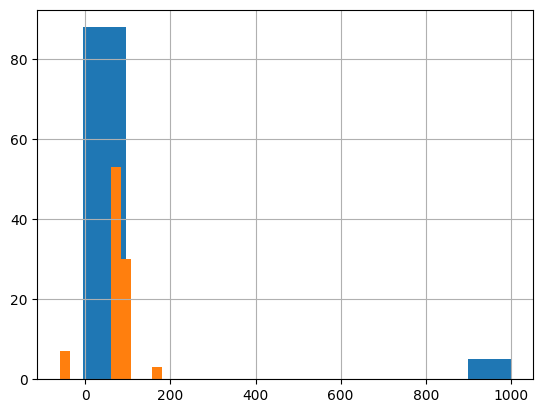

In [12]:
df['Age_Years'].hist().plot()
df['Weight_kg'].hist().plot()

In [13]:
# Correct erroneous entries
df.loc[(df['Age_Years'] <= 0) | (df['Age_Years'] >= 110), 'Age_Years'] = np.nan
df.loc[(df['Weight_kg'] <= 0) | (df['Weight_kg'] >= 200), 'Weight_kg'] = np.nan

In [14]:
# Interpolation
median_imputer = df.median(numeric_only=True)

In [18]:
df.fillna(median_imputer).head(4)

,Patient_ID,Age_Years,Gender,Blood_Pressure,Weight_kg,Height_cm,Diagnosis,Insurance_Type,Glucose_mg_dL
0,2001,45.0,Male,120.0,75.5,175.0,Hypertension,Private,98
1,2002,62.0,Female,145.0,88.0,162.0,Diabetes,Public,185
2,2003,48.0,Female,110.0,79.0,168.0,Diabetes,Private,92
3,2004,30.0,Male,130.0,80.0,170.0,Flu,Public,105


In [19]:
mode_diagnosis = df['Diagnosis'].mode()[0]
df['Diagnosis'] = df['Diagnosis'].fillna(mode_diagnosis)

In [17]:
# Standardization
df['Gender'] = df['Gender'].replace({'F': 'Female', 'M': 'Male', 'Other': 'Unknown'})

In [20]:
df['Insurance_Type'].replace({'Govt': 'Public'})

,Insurance_Type
0,Private
1,Public
2,Private
3,Public
4,Private
...,...
95,Public
96,Private
97,Public
98,Public


In [21]:
df['Gender'] = df['Gender'].astype('category')
df['Insurance_Type'] = df['Insurance_Type'].astype('category')
df['Diagnosis'] = df['Diagnosis'].astype('category')

In [22]:
df.head(10)

,Patient_ID,Age_Years,Gender,Blood_Pressure,Weight_kg,Height_cm,Diagnosis,Insurance_Type,Glucose_mg_dL
0,2001,45.0,Male,120.0,75.5,175.0,Hypertension,Private,98
1,2002,62.0,Female,145.0,88.0,162.0,Diabetes,Public,185
2,2003,NaN,Female,110.0,NaN,168.0,Diabetes,Private,92
3,2004,30.0,Male,130.0,80.0,NaN,Flu,Public,105
4,2005,45.0,Male,120.0,75.5,175.0,Hypertension,Private,98
5,2006,NaN,Unknown,NaN,72.0,170.0,Allergy,Public,101
6,2007,78.0,Male,155.0,95.0,178.0,Stroke,Private,400
7,2008,55.0,Female,125.0,180.0,165.0,Diabetes,Public,135
8,2009,22.0,Male,115.0,70.0,175.0,Flu,Govt,95
9,2010,NaN,Female,135.0,NaN,170.0,Asthma,Private,110
